In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Flatten, Activation, Dense, Concatenate, Dot, Lambda, Input
from keras.datasets import mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import pickle
from sklearn import svm
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from google.colab.patches import cv2_imshow
from keras.layers.normalization import BatchNormalization
from numpy import load 

Using TensorFlow backend.


In [2]:
!pwd
!rm -rf ASL-PSL-Sign-Language-Gestures
!rm -rf Gestures

/content


In [3]:
!git clone https://github.com/KuldeepDileep/ASL-PSL-Sign-Language-Gestures.git
!rm -rf ASL Gestures
!rm -rf PSL Gestures
!mkdir -p Gestures

Cloning into 'ASL-PSL-Sign-Language-Gestures'...
remote: Enumerating objects: 405, done.
remote: Total 405 (delta 0), reused 0 (delta 0), pack-reused 405
Receiving objects: 100% (405/405), 717.55 MiB | 36.97 MiB/s, done.
Resolving deltas: 100% (90/90), done.
Checking out files: 100% (61/61), done.


In [4]:
import zipfile
with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/m.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Gestures')
with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/d.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Gestures')
with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/u.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Gestures')
# with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/ASL-1.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/Gestures')
# with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/ASL-2.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/Gestures')
# with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/ASL-3.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/Gestures')
# with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/ASL-4.zip', 'r') as zip_ref:
#   zip_ref.extractall('/content/Gestures')
# with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/ASL-5.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/Gestures')
# with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/ASL-6.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/Gestures')
# with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/ASL-7.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/Gestures')
# with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/ASL-8.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/Gestures')
# with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/ASL-9.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/Gestures')
# with zipfile.ZipFile('/content/ASL-PSL-Sign-Language-Gestures/ASL-10.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/Gestures')

In [5]:
TrainDir = '/content/Gestures'

count=0
current_id = 0
label_ids = {}
x_train = []
y_labels= []

image_train = []
label_train =[]


#---------------------------------------Extracting Train Images-----------------------------------------
for root, dirs, files in os.walk(TrainDir):
    for file in files:
        if file.endswith("png") or  file.endswith("jpeg") or file.endswith("jpg"):
            count+=1
            path = os.path.join(root, file)
            label = os.path.basename(os.path.dirname(path)).replace(" ",",").lower()
            label = os.path.basename(root).replace(" ",",").lower()
            if not label in label_ids: #if the current label is not in dictionsry we save it with the corresponding current_id i.e 0,1,2
                label_ids[label] = current_id
                current_id +=1
            id_ = label_ids[label]
            label_train.append(id_)

            
            image_array = plt.imread(path)
            image_array = cv2.resize(image_array, (224,224), interpolation=cv2.INTER_LINEAR)
            #image_array = cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
            image_array = np.array(image_array, dtype='float16')
            image_train.append(image_array)
            #print(image_array)
print("----------------------------Label_ids----------------------------------")
print(label_ids)
print(label_ids)
print(count)

----------------------------Label_ids----------------------------------
{'h': 0, 'b': 1, 'm': 2, 'd': 3, 'p': 4, 'i': 5, 'n': 6, 'v': 7, 'c': 8, 'a': 9, 'g': 10, 'e': 11, 'u': 12, 'k': 13}
{'h': 0, 'b': 1, 'm': 2, 'd': 3, 'p': 4, 'i': 5, 'n': 6, 'v': 7, 'c': 8, 'a': 9, 'g': 10, 'e': 11, 'u': 12, 'k': 13}
4200


In [6]:
image_train = np.asarray(image_train)
label_train = np.asarray(label_train)
x_train = image_train
y_train = label_train
print(y_train.shape)
print(x_train.shape)

(4200,)
(4200, 224, 224)


Spliting data:

In [7]:
#-----------------------------------------------Test and Train Spli--------------------------------------
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)
#print(x_train.shape)
#print(x_test.shape)

Data Normalization:

In [8]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_test)

One-Hot Encoding:

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3360, 224, 224)
(3360, 14)
(840, 224, 224)
(840, 14)


AlexNet (8 Layers):

In [11]:
x_train = x_train.reshape((x_train.shape[0], 224, 224, 1))
x_test = x_test.reshape((x_test.shape[0], 224, 224, 1))
epochs = 50
num_classes = 14

In [18]:
# Instantiate a Sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=64, input_shape=(224, 224, 1), kernel_size=(3, 3), strides=(4, 4), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*1,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 56, 56, 64)        640       
_________________________________________________________________
activation_17 (Activation)   (None, 56, 56, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 256)       409856    
_________________________________________________________________
activation_18 (Activation)   (None, 28, 28, 256)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 384)      

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


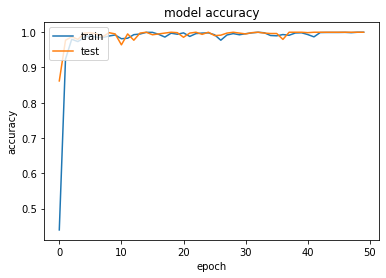

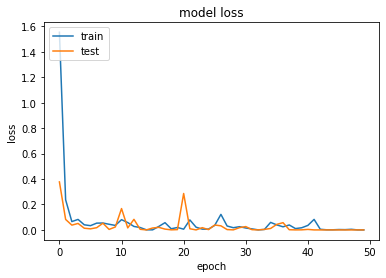

In [19]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
result = model.evaluate(x_train, y_train)
print('train loss, train acc:', result)
result2 = model.evaluate(x_test, y_test)
print('test loss, test acc:', result2)

3360/3360 [==============================] - 2s 510us/step
train loss, train acc: [1.1349567403736874e-06, 1.0]
840/840 [==============================] - 0s 494us/step
test loss, test acc: [6.071968854149374e-07, 1.0]


In [21]:
print(history.history.values())

dict_values([[0.37736988578523906, 0.08247655766705672, 0.03759345404715055, 0.05084069752622218, 0.013415476713063462, 0.008458629411593609, 0.01754755588425767, 0.052543496238511234, 0.004017605224535579, 0.023079115099140575, 0.16786022974594658, 0.015983235351173096, 0.08313210337267568, 0.004861659111328381, 1.3635645342768315e-05, 0.014953064807295526, 0.02018187115669813, 0.006367680953311113, 0.0005897122293607112, 0.0023804339188722053, 0.28639124553384526, 0.009164205167949798, 0.00011144093830136539, 0.01764077916297884, 0.0023174089852199403, 0.03863574690798747, 0.03210581643851626, 0.0026770092705971494, 0.0004781478230056347, 0.0178502379475, 0.02615001742530337, 0.0020146463651193307, 0.00028056773004761585, 0.0039163828693730895, 0.011503928090725627, 0.043656379754074374, 0.05695368114592427, 0.0015670007498383277, 0.00023309615033318277, 0.0006126315736908271, 0.00407437232491274, 4.185151121051588e-05, 4.2210171408268725e-06, 9.248950816152486e-05, 1.457739959320747

In [22]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("AlexNet_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("AlexNet_model.h5")
print("Saved model to disk")

Saved model to disk


Prediction:

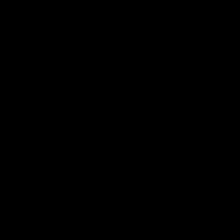

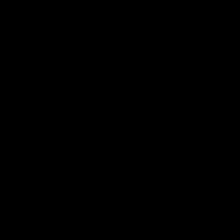

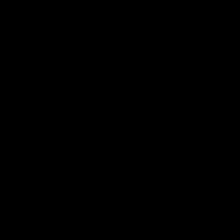

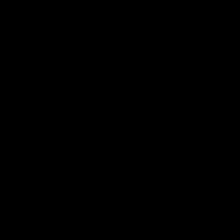

[1 0 2 2]


In [ ]:
use_samples = [1, 2, 3, 4]
samples_to_predict = []
# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = x_train[sample]
  samples_to_predict.append(reshaped_image)
  cv2_imshow(reshaped_image)
samples_to_predict = np.asarray(samples_to_predict)
predictions = model.predict(samples_to_predict)
classes = np.argmax(predictions, axis = 1)
pred_labels = classes
print(classes)

In [ ]:
for i in use_samples:
    count=0
    for j in y_train[i]:
      if j==1:
        print(count)
        break
      else:
        count+=1

1
0
2
2
